In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


In [10]:
df=pd.read_csv("data2.csv")

In [11]:
df.head()


,input,output
0,1,101
1,2,102
2,3,103
3,4,104
4,5,105


In [14]:
x=df[["input"]].values

In [16]:
y=df[["output"]].values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

import tensorflow as tf

model=tf.keras.Sequential([tf.keras.layers.Dense(8,activation='relu'),
                           tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(1)])
model.compile(loss="mae",optimizer="adam",metrics=["mse"])

history=model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 577ms/step - loss: 108.4835 - mse: 11788.0303
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 108.4638 - mse: 11783.6865
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 108.4449 - mse: 11779.5000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 108.4267 - mse: 11775.4912
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 108.4087 - mse: 11771.5117
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 108.3908 - mse: 11767.5615
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 108.3730 - mse: 11763.6396
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 108.3553 - mse: 11759.7471
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 108.3378 - mse: 11755.8857
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 108.3204 - mse: 11752.0508
Epoch 1

<tf.Tensor: shape=(), dtype=float32, numpy=45.11119>

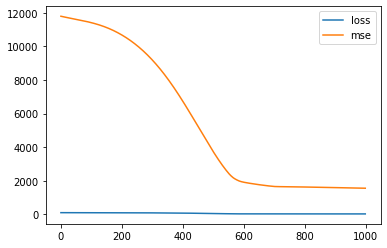

In [18]:
import numpy as np

x_test

preds=model.predict(x_test)
np.round(preds)

tf.round(model.predict([[20]]))

pd.DataFrame(history.history).plot()

r=tf.keras.metrics.RootMeanSquaredError()
r(y_test,preds)